In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Is the sampling biased?
# What is the business case

In [51]:
# read in housing data
housing = pd.read_csv('./datasets/houses_to_rent_brazil.csv')

In [52]:
# some attributes are not numeric
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [53]:
# housing['floor'] has some fields that are note convertable to numerica values.
# convert to numeric if possible
housing['floor'] = pd.to_numeric(housing['floor'], downcast='integer', errors='coerce')

# drop the ones that are note convertable  # or replace but this would require more insight
housing.dropna(inplace=True)

In [55]:
# pdated dataframe
# maybe we should test if using the origin floor data as catirogical attribute cahnges the 
# the outcome? Maybe the landlords tend to left them out on purpouse?
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8231 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 8231 non-null   object 
 1   area                 8231 non-null   int64  
 2   rooms                8231 non-null   int64  
 3   bathroom             8231 non-null   int64  
 4   parking spaces       8231 non-null   int64  
 5   floor                8231 non-null   float64
 6   animal               8231 non-null   object 
 7   furniture            8231 non-null   object 
 8   hoa (R$)             8231 non-null   int64  
 9   rent amount (R$)     8231 non-null   int64  
 10  property tax (R$)    8231 non-null   int64  
 11  fire insurance (R$)  8231 non-null   int64  
 12  total (R$)           8231 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 900.3+ KB


In [68]:
housing['hoa (R$)'].value_counts()

0       297
400     169
500     160
300     157
450     134
       ... 
227       1
2274      1
219       1
5767      1
1867      1
Name: hoa (R$), Length: 1644, dtype: int64

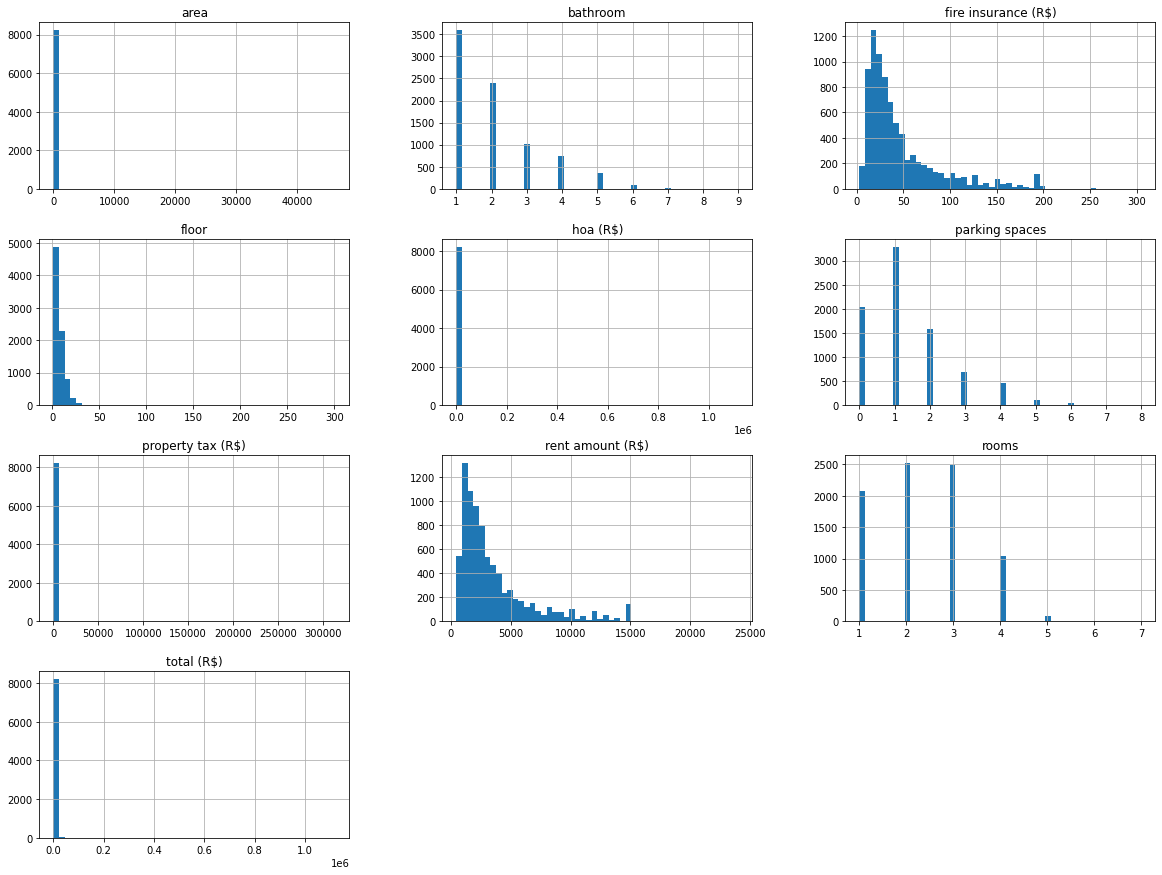

In [71]:
# It seems there are quite some outliers. Attributes bathroom, floor, rooms, maybe
# property-tax (depending on Brazil taxation), animals allowed and furniture are 
# cotergorical.
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Create training data set